# SVM(Support Vector Machine )

### SVM을 활용한 비만도(BMI) 측정 예측
- BMI = 몸무게(Kg) / 키(m) * 키(m)
- BMI가 18.5이상 25미만일때가 표준 몸무게 입니다.

In [1]:
# 데이터를 획득하기 위해 무작위 2만명 데이터를 생성.
# 키(cm), 몸무게(Kg), Label(저체중(thin), 정상체중(normal), 비만(fat))의 csv 생성

import random

# BMI를 계산해서 Label을 return하는 함수
def calc_bmi(h, w):
    bmi = w / (h/100) ** 2
    if bmi < 18.5: return 'thin'
    if bmi < 25: return 'normal'
    return 'fat'

# 저장 파일 준비하기
fp = open("../Data/bmi.csv", 'w', encoding='utf-8')
fp.write("height,weight,label\r\n")

# 무작위로 데이터 생성하기
cnt = {"thin":0, "normal":0, "fat":0}

for i in range(20000):
    h = random.randint(120, 200)
    w = random.randint(35, 80)
    label = calc_bmi(h, w)
    cnt[label] += 1
    fp.write("{0},{1},{2}\r\n".format(h,w,label))
fp.close()
print("ok :", cnt)

ok : {'thin': 6434, 'normal': 5897, 'fat': 7669}


### BMI공식을 사용하지 않고 BMI 예측

In [2]:
import pandas as pd

In [3]:
# 데이터 불러오기
tbl = pd.read_csv('../Data/bmi.csv')
tbl.head()

,height,weight,label
0,141,36,thin
1,200,54,thin
2,163,59,normal
3,192,40,thin
4,150,35,thin


In [6]:
# 컬럼을 분리하여 정규화 하기
tbl.describe()

label = tbl['label']
w = tbl['weight'] / 80
h = tbl['height'] / 200

In [12]:
# w, h를 하나로 합치기 
data = pd.concat([h, w], axis=1)
data.head()

,height,weight
0,0.705,0.4500
1,1.000,0.6750
2,0.815,0.7375
3,0.960,0.5000
4,0.750,0.4375


In [13]:
# 학습용과 훈련용으로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    label                                    
                                                   )  # X:Feature, y:Target(label)

In [20]:
# 데이터 학습하기
import sklearn.svm as svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [21]:
# 정확도 구하기
clf.score(X_test, y_test)

0.98

In [22]:
# Confusion Matrix 출력하기
from sklearn import metrics
pred = clf.predict(X_test)
cfm = metrics.confusion_matrix(y_test, pred)
print(cfm)
report = metrics.classification_report(y_test, pred)
print(report)

[[1864   42    0]
 [  16 1468    6]
 [   0   36 1568]]
              precision    recall  f1-score   support

         fat       0.99      0.98      0.98      1906
      normal       0.95      0.99      0.97      1490
        thin       1.00      0.98      0.99      1604

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000



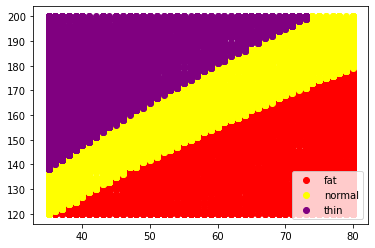

In [31]:
# 시각화 해보기
import matplotlib.pyplot as plt
tbl = pd.read_csv("../Data/bmi.csv", index_col=2) # 2번 컬럼을 인덱스로 사용
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

def scatter(lbl, color):
    b = tbl.loc[lbl]                              # 인덱스로 불러온다
    ax.scatter(b['weight'], b['height'], c=color, label=lbl)

scatter("fat", "red")
scatter("normal", "yellow")
scatter("thin", "purple")
ax.legend()
plt.savefig('../Data/bim-test.png')
plt.show()

---
# SVM의 종류
- SVC(Classification)
- NuSVC : "
- LinearSVC : SVM중에서 가장 빠름, SVC대비 약 3배정도 빠름

In [32]:
# 데이터 학습하기
clf = svm.LinearSVC()
clf.fit(X_train, y_train)

LinearSVC()

In [33]:
# 정확도 구하기
clf.score(X_test, y_test)

0.9204

In [34]:
# Confusion Matrix 출력하기
from sklearn import metrics
pred = clf.predict(X_test)
cfm = metrics.confusion_matrix(y_test, pred)
print(cfm)
report = metrics.classification_report(y_test, pred)
print(report)

[[1906    0    0]
 [ 222 1092  176]
 [   0    0 1604]]
              precision    recall  f1-score   support

         fat       0.90      1.00      0.94      1906
      normal       1.00      0.73      0.85      1490
        thin       0.90      1.00      0.95      1604

    accuracy                           0.92      5000
   macro avg       0.93      0.91      0.91      5000
weighted avg       0.93      0.92      0.92      5000

